<h1> 1. Making Interactive Visualizations with Python (50 points)

<h3> 1.1 Please show the standard scatter plot which you are going to add interaction, submit the screenshot of the graph, and describe your data/graph including all labels and legends.

In [2]:
import requests
import pandas as pd
import seaborn as sb
from PIL import Image
import plotly.express as px
import matplotlib.pyplot as plt

df = pd.read_json('https://raw.githubusercontent.com/vega/vega-datasets/next/data/movies.json')
# Remove redundant columns and drop any row having missing data
df = df.iloc[:, [0, 1, 2, 4, 5, 8, 10, 14, 15]].dropna(how='any')
# Create a year column out of release date and drop release date
df['year'] = df['Release Date'].str[-4:].astype('int')
df = df.drop(columns='Release Date').sort_values(by='year', ignore_index=True)
# Filter year
df = df[df['year'] <= 2021]

In [3]:
df.head()

,Title,US Gross,Worldwide Gross,Production Budget,Distributor,Major Genre,IMDB Rating,IMDB Votes,year
0,The Broadway Melody,2800000.0,4358000.0,379000.0,MGM,Musical,6.7,2017.0,1928
1,Mr. Smith Goes To Washington,9000000.0,9000000.0,1500000.0,Sony/Columbia,Drama,8.2,33315.0,1938
2,Rebecca,6000000.0,6000000.0,1288000.0,MGM,Drama,8.4,35429.0,1939
3,Casablanca,10462500.0,10462500.0,950000.0,Warner Bros.,Drama,8.8,167939.0,1941
4,Bathing Beauty,3500000.0,3500000.0,2361000.0,MGM,Musical,6.2,487.0,1943


* Title: Movie name
* US Gross: The revenue from the movie in the US
* Worldwide Gross: The revenue from the movie in the world
* Production Budget: Cost of making the movie
* Distributor: Distributor of the movie
* year: The year the movie was released
* Major genre: Main genre of the movie
* IMDB Rating: The Rating from IBDM
* IMDB Votes: How many votes the movie received from IMDB


<h4> Standard scatterplot

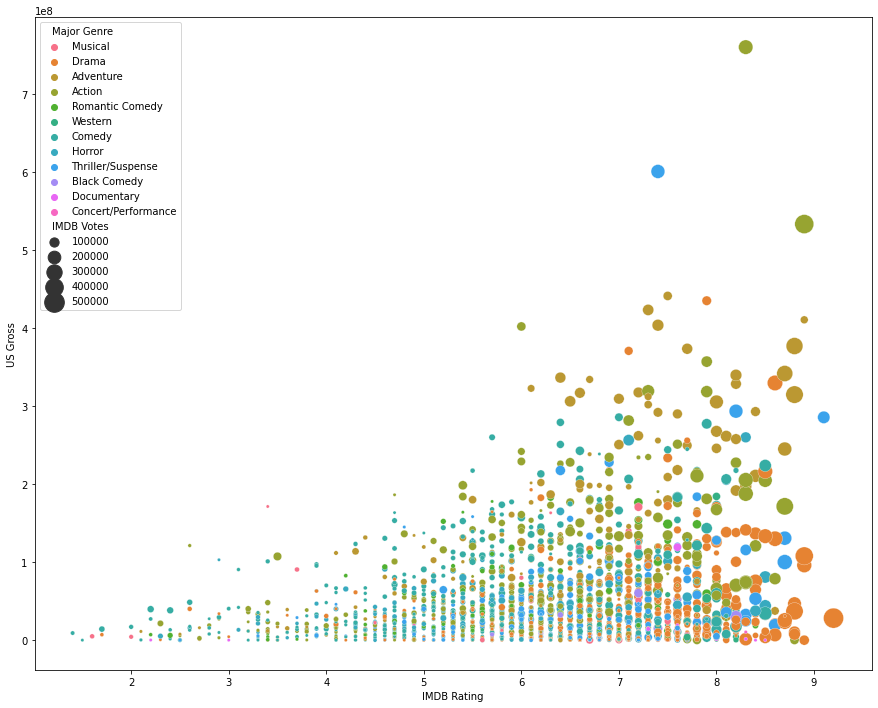

In [4]:
# Size of the plot
plt.figure(figsize=(15,12)) 
# Min size and max size in the scatter plot
minsize, maxsize = 10, 400
sb.scatterplot(data=df, x='IMDB Rating', y='US Gross', hue='Major Genre', size='IMDB Votes',sizes=(minsize, maxsize))
plt.show()


Data description:
* X axis: IMDB Rating
* Y axis: US Revenue from the movie ($ 10<sup>8</sup>)
* Legend
 - The color channel represents levels of genres
 - The size channel represents levels of binned IMDB Votes

<h3>1.2 Which library/ packageare you going to use for interactive visualizationin this lab? Simply describe them(such as Matplotlib, Plotly, Altair, etc.)
<br>Answer: matplotlib, seaborn, plotly

<h3>1.3 Create a selection object on your graph and bound it to one of the legends. Submit a screenshot of the graph which contains the selection object and a screenshot of your code (commented properly).

In [5]:
'''
x axis: IMBD Rating
y = US Gross
color parameter is color chanel
symbol parameter is marker chanel
size is size channel'''
fig = px.scatter(df, x="IMDB Rating", y="US Gross", color="Major Genre", symbol='Major Genre',
                 size='IMDB Votes')
fig.show()

<h3> 1.4 Create multiple plots which contains one interactive legend.Submit a screenshot of the multiple plotsand a screenshot of your code (commented properly). Add a selection object on the multiple plots, submit a screenshot of the selected multiple plotsand a screenshot of your code (commented properly).Describe differences between multipleplots. Analysis the data based on the plots.

In [6]:
# Create bins and labels for a new column: IMDB level from IMDB Rating
bins = [0, 2, 4, 6, 8, 10]
labels = [1,2,3,4,5]
filtered_df = df.copy()
filtered_df['IMDB_level'] = pd.cut(filtered_df['IMDB Rating'], bins=bins, labels=labels)
# Create multiple subplots
fig = px.scatter(filtered_df, x="IMDB Rating", y="IMDB Votes", facet_col="IMDB_level", color='Major Genre',
          )
fig.show()

<h1> 2. Panning and Zooming

<h3> 2.1 Panning on the graph. Submit a screenshot of the graph and a
screenshot of your code (commented properly). 


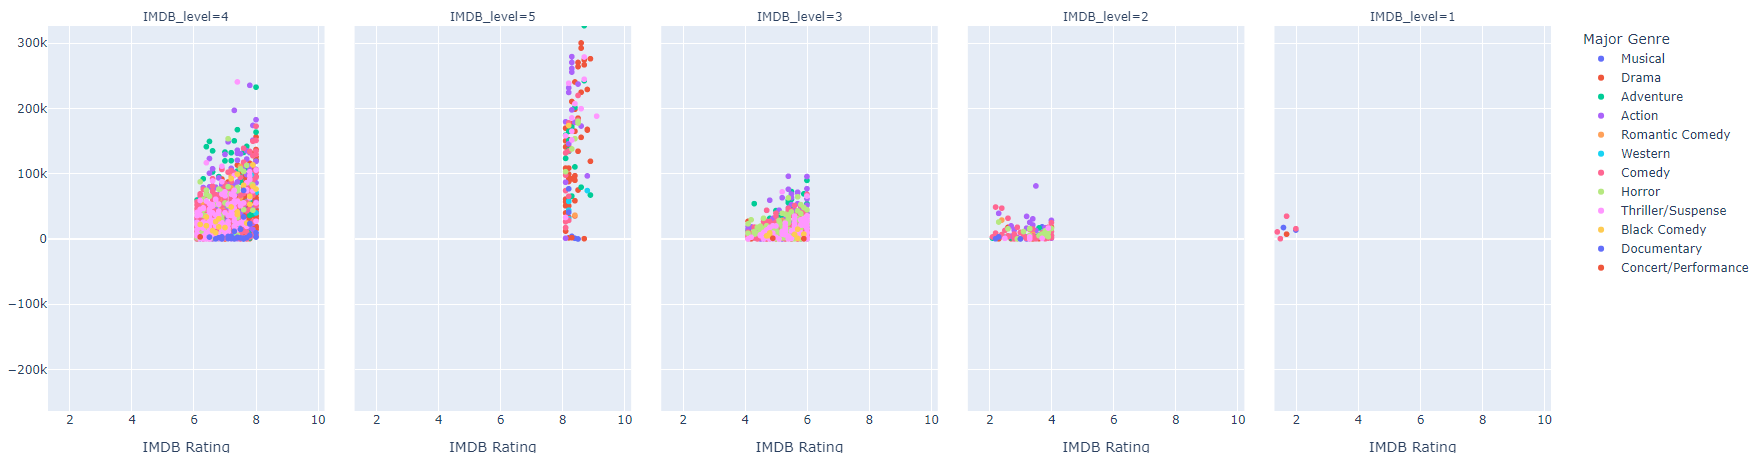

In [7]:
panning = "https://raw.githubusercontent.com/teohangxanh/5320/main/ICE-10/Panning.png" # url to the screenshot
im = Image.open(requests.get(panning, stream=True).raw) # Save the image to the variable
im

<h3> 2.2 Zoom in and out on the graph. Submit two screenshots of the graph
and a screenshot of your code (commented properly). 


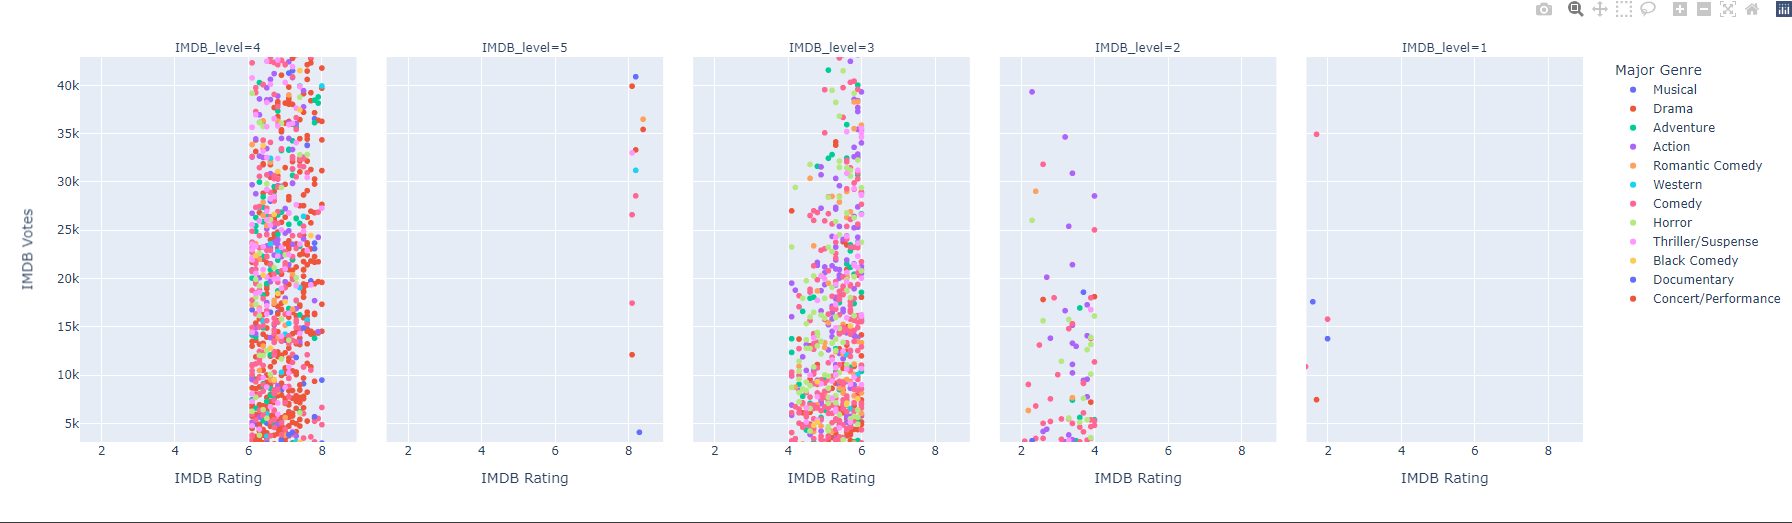

In [8]:
zoom_in = "https://raw.githubusercontent.com/teohangxanh/5320/main/ICE-10/Zoom%20in.png" # url to the screenshot
im = Image.open(requests.get(zoom_in, stream=True).raw) # Save the image to the variable
im

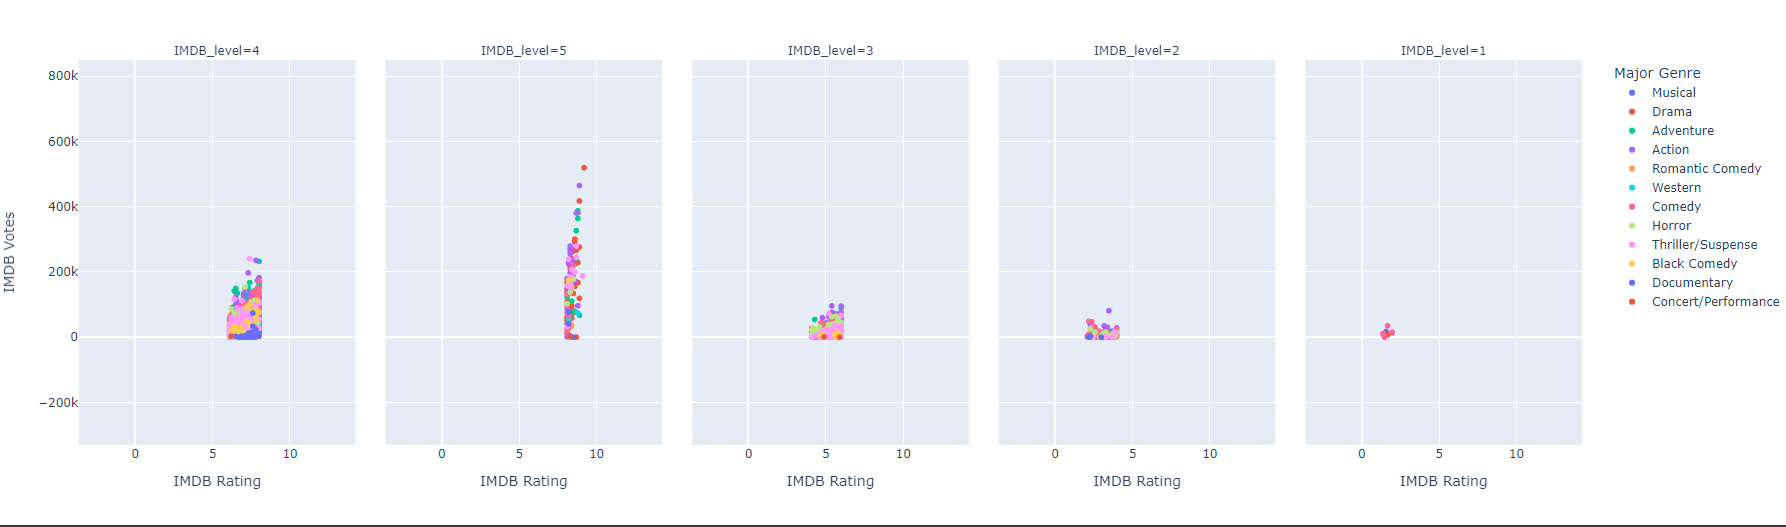

In [9]:
zoom_out = "https://raw.githubusercontent.com/teohangxanh/5320/main/ICE-10/Zoom%20out.png" # url to the screenshot
im = Image.open(requests.get(zoom_out, stream=True).raw) # Save the image to the variable
im

<h3> 2.3 What are the pros and cons of Panning and Zooming? Give
sufficient explanation with examples.

* Panning:
  - Pros: Helps us move our focus to a different angle
  - Cons: Particularly in this ICE, each subplot has different scattering data points. Hence, it's hardly possible to pan all subplots such that every subplot is at the center of our focus for compare and contrast.

* Zooming in:
  - Pros: Helps us focus on the details / small parts of an image
  - Cons: The more zooming-in, the less the sharpness of the image

* Zooming out:
  - Pros: Helps us have a general view of the whole picture for analysis
  - Cons: We may lose specific features of a part of a picture

<h1> 3. Adding Tooltips

<h3> 3.1 Adding at least two different tooltips on your graph. Submit a
screenshot of the graph and a screenshot of your code (commented
properly).


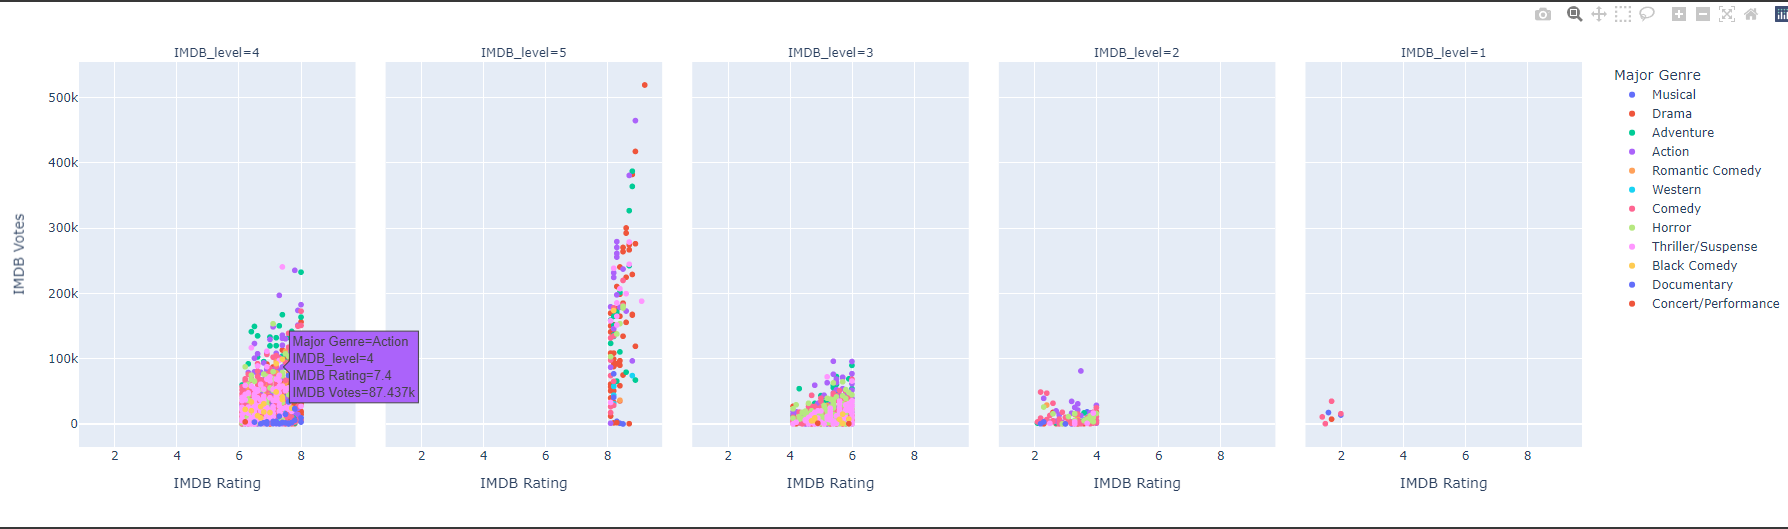

In [10]:
# Tooltip 1 effect: Mouse hovering
tt1 = 'https://raw.githubusercontent.com/teohangxanh/5320/main/ICE-10/Tooltip%201.png' # url to the screenshot
im = Image.open(requests.get(tt1, stream=True).raw) # Save the image to the variable
im

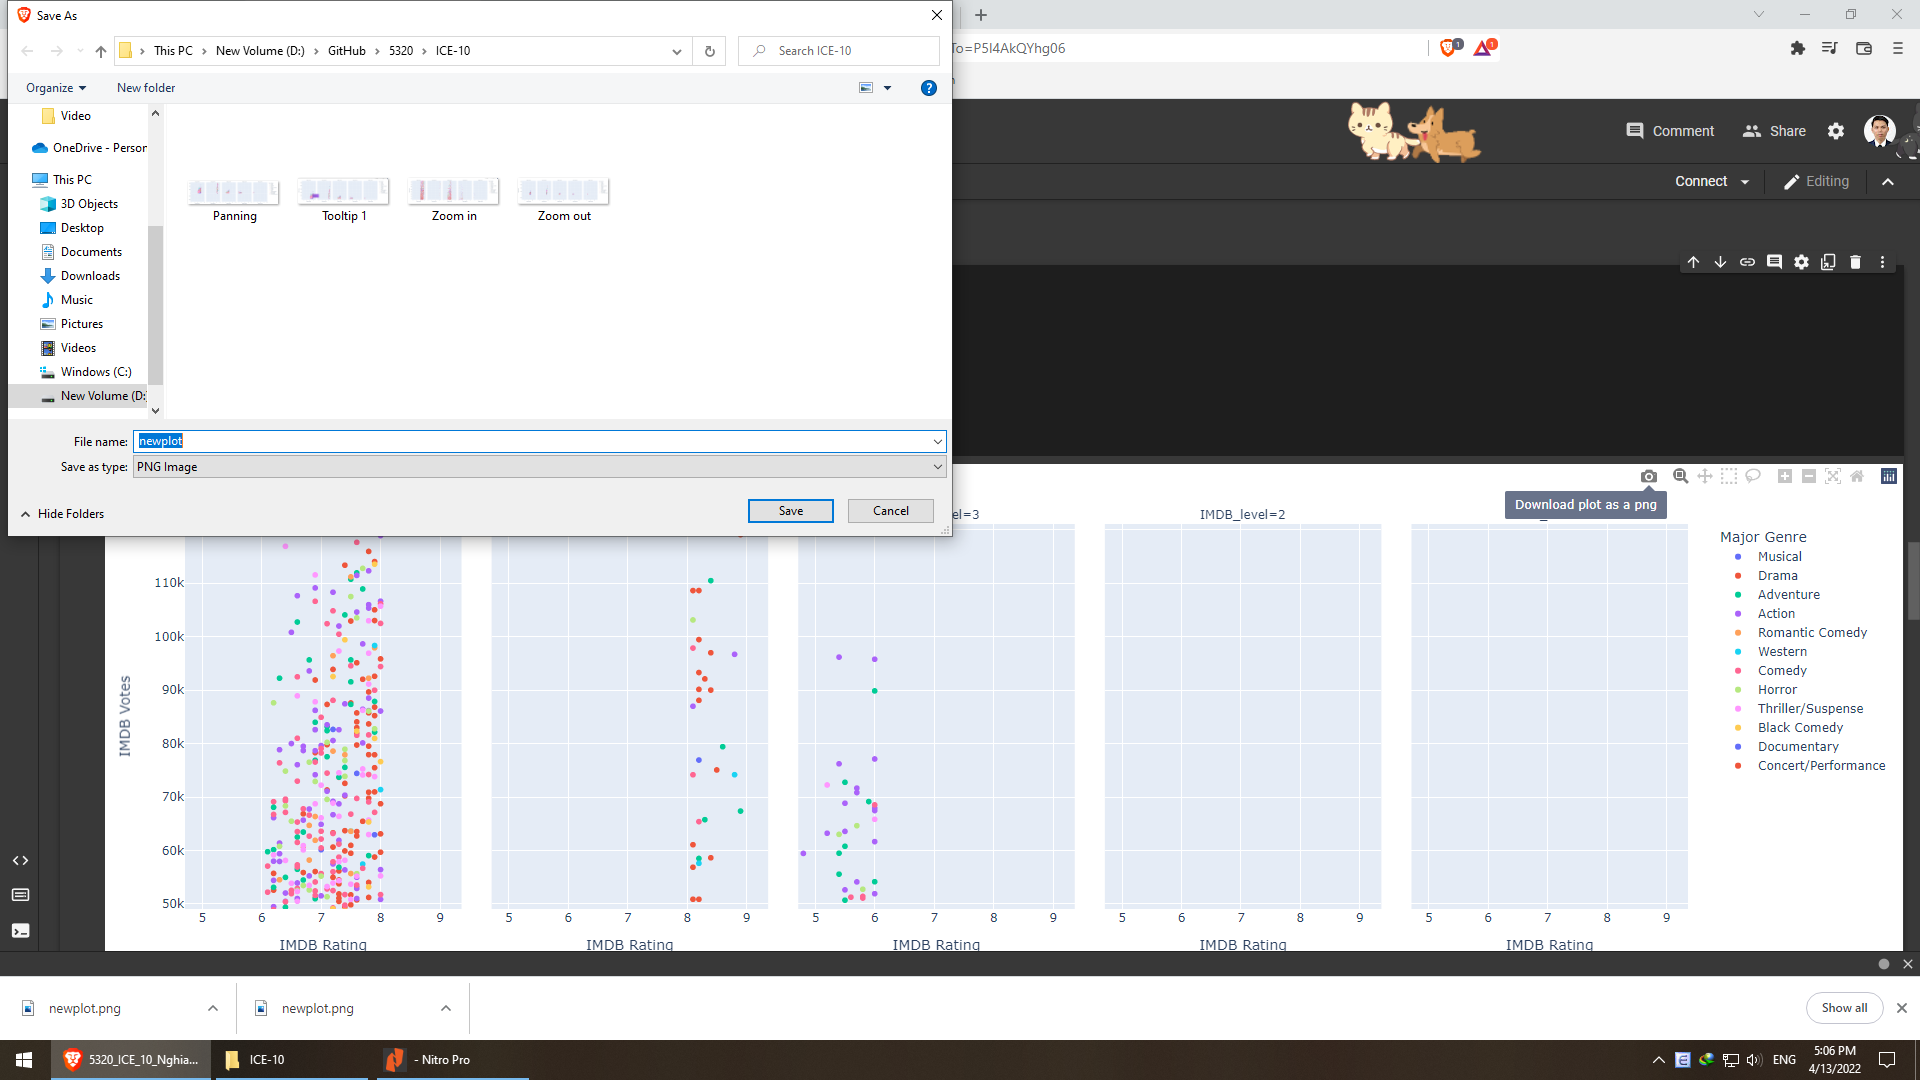

In [11]:
# Tooltip 2 effect: We can download a modified (after spanning or zooming) picture
tt2 = 'https://raw.githubusercontent.com/teohangxanh/5320/main/ICE-10/Tooltip%202.png' # url to the screenshot
im = Image.open(requests.get(tt2, stream=True).raw) # Save the image to the variable
im

<h3> 3.2 Why you are choosing these elements/ labels as tooltips. What are
the advantages with or without the tooltips?  

* It is easy to check data values
* It is convenient to check for anomaly visually
* It is fast to download the picture without code. In other words, it is a friendly API for non-coders
